In [1]:
# Import required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
#Read the data

startups = pd.read_csv("50_Startups.csv")
startups.head(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


In [3]:
# Renaming columns 

startups = startups.rename({'R&D Spend': 'RAndD_Spend','Marketing Spend':'Marketing_Spend'}, axis=1)
startups

,RAndD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# EDA

startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RAndD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.describe()

,RAndD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#check for missing values

startups.isna().sum()

RAndD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# Checking for Duplicated values

startups[startups.duplicated()]

,RAndD_Spend,Administration,Marketing_Spend,State,Profit


In [8]:
# Checking for correlation among X columns

startups.corr()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_14276\4283071219.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startups.corr()


,RAndD_Spend,Administration,Marketing_Spend,Profit
RAndD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


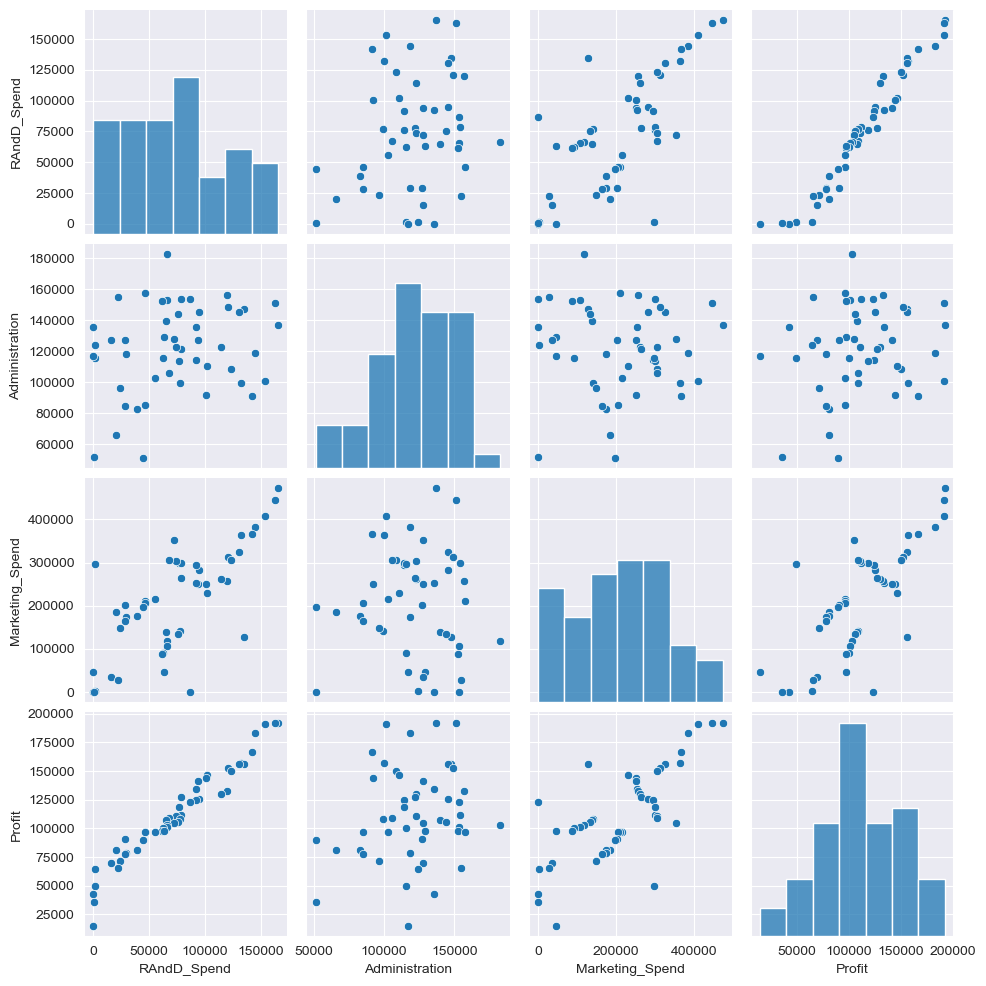

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

# There isn't any strong correlation among X columns, so not comparing & selecting among X columns

In [10]:
# Preparing a Preliminary Model with all X columns

model = smf.ols('Profit~RAndD_Spend+Administration+Marketing_Spend',data=startups).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        20:10:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RAndD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Coefficients

model.params

Intercept          50122.192990
RAndD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [12]:
#t and p-Values

print(model.tvalues, '\n\n', model.pvalues)

Intercept           7.626218
RAndD_Spend        17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 

 Intercept          1.057379e-09
RAndD_Spend        2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [13]:
#R squared values

(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
# SLR & MLR for Administration & Marketing Spend

model_Admin=smf.ols('Profit~Administration',data=startups).fit()
model_Admin.tvalues , model_Admin.pvalues # Insignificant p-value

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [15]:
model_MarkSpend=smf.ols('Profit~Marketing_Spend',data=startups).fit()
model_MarkSpend.tvalues , model_Admin.pvalues # Insignificant p-value

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [16]:
model_MS_Ad=smf.ols('Profit~Marketing_Spend+Administration',data=startups).fit()
model_MS_Ad.tvalues , model_MS_Ad.pvalues

(Intercept          1.142741
 Marketing_Spend    8.281039
 Administration     2.467779
 dtype: float64,
 Intercept          2.589341e-01
 Marketing_Spend    9.727245e-11
 Administration     1.729198e-02
 dtype: float64)

In [17]:
startups.head(5)

,RAndD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
# Calculating Variance Inflation Factor (VIF)

rsq_rd = smf.ols('RAndD_Spend~Administration+Marketing_Spend',data=startups).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~RAndD_Spend+Marketing_Spend',data=startups).fit().rsquared  
vif_ad = 1/(1-rsq_ad) 

rsq_ms = smf.ols('Marketing_Spend~Administration+RAndD_Spend',data=startups).fit().rsquared  
vif_ms = 1/(1-rsq_ms) 

# Storing vif values in a data frame
d1 = {'Variables':['RAndD_Spend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RAndD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [19]:
# VIF is in range 0-5 for all the Numeric X variables, which is considered Excellent
# We can safely assume there is no correlation between X variables

In [20]:
# We also do not need AIC for subset selection as there is no dependency between X columns

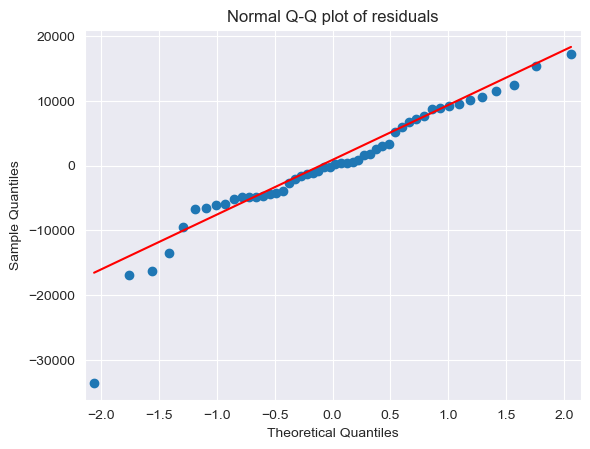

In [21]:
# Residual Analysis

import statsmodels.api as sm

model = smf.ols('Profit~RAndD_Spend+Administration+Marketing_Spend',data=startups).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
# (y-y_hat) values

model.resid 

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

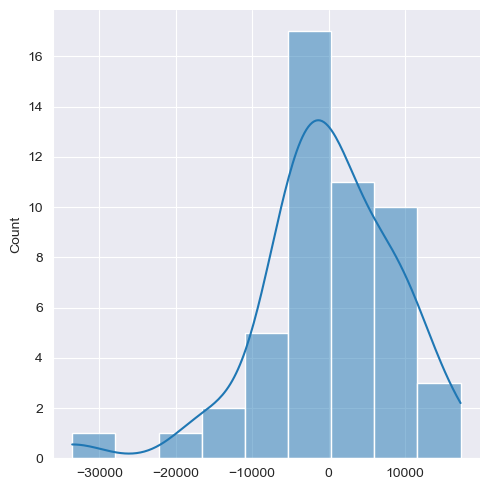

In [23]:
# Residual values distribution

sns.displot(model.resid, kde=True) 

In [24]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

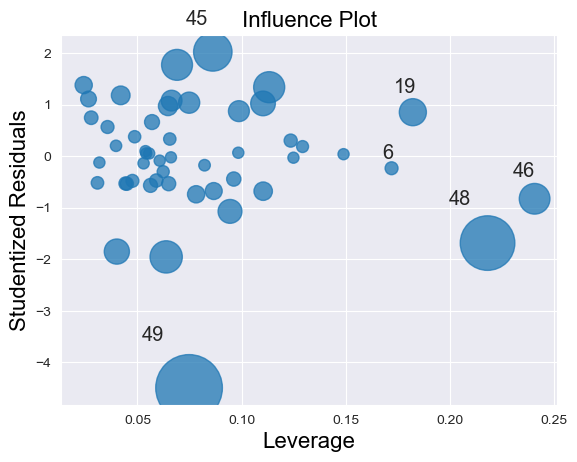

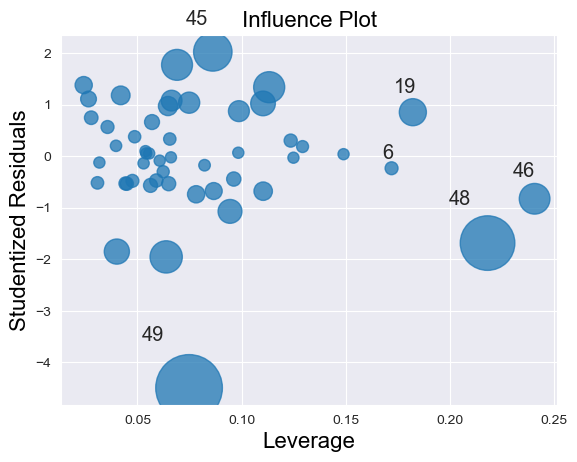

In [25]:
sm.graphics.influence_plot(model)

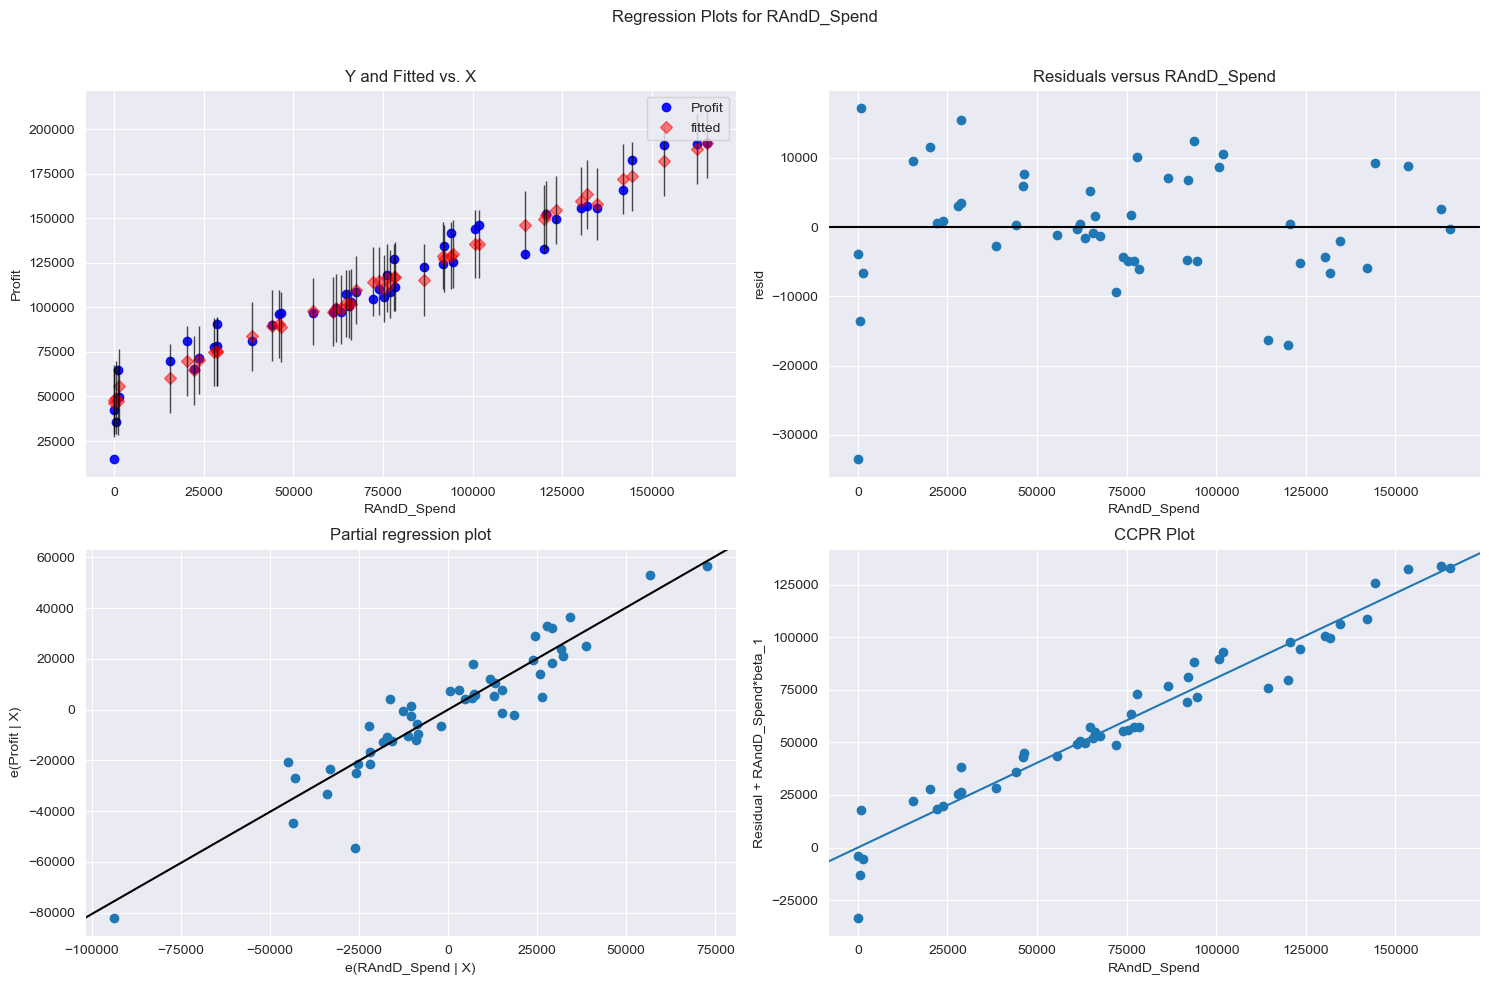

In [26]:
# Residuals vs Regressors Plot

fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "RAndD_Spend", fig=fig)
plt.show()

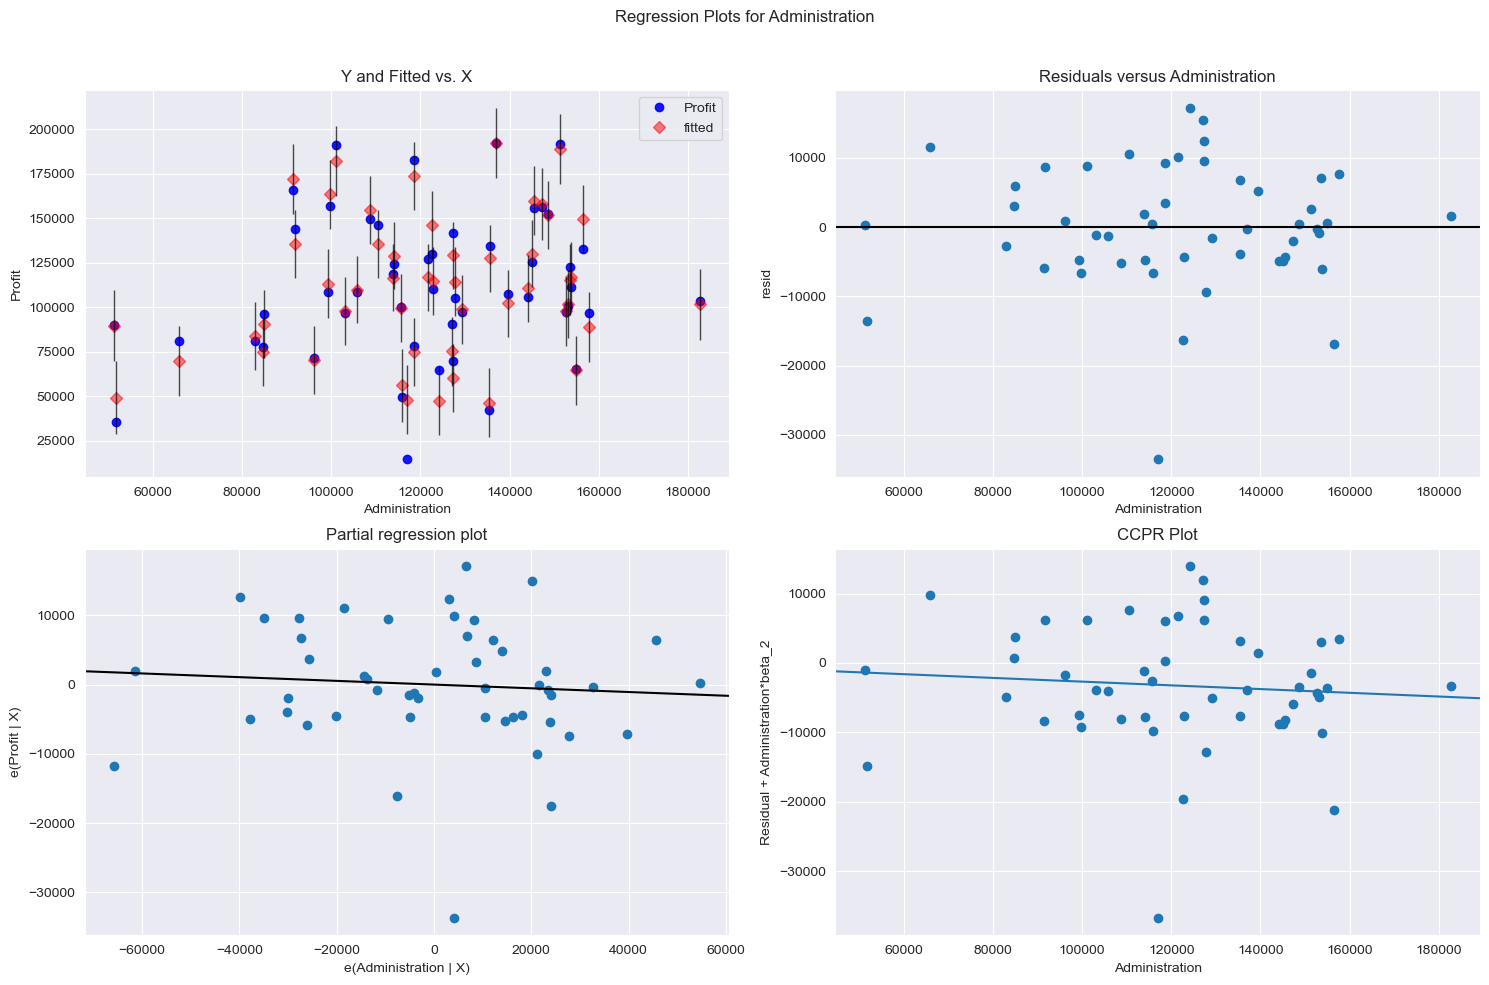

In [27]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

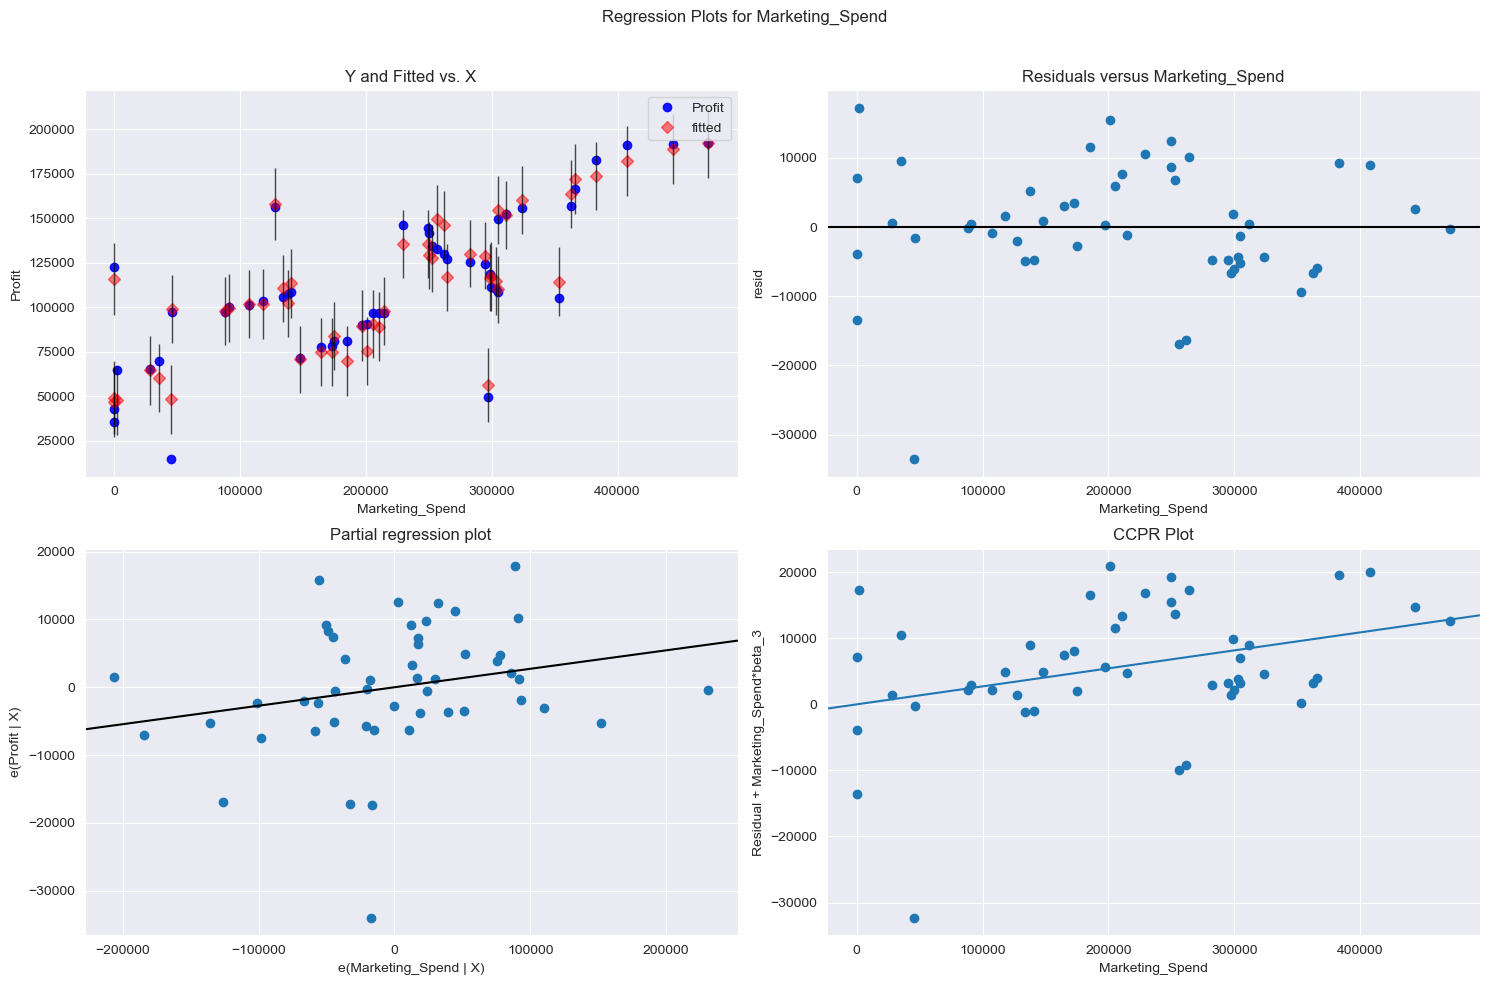

In [28]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

In [29]:
# Residual Plot for Homoscedasticity

In [30]:
# ŷ

model.fittedvalues 

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [31]:
# y-ŷ --> Error values

model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [32]:
# Z-scores of errors (Z = x-μ/σ)

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()   

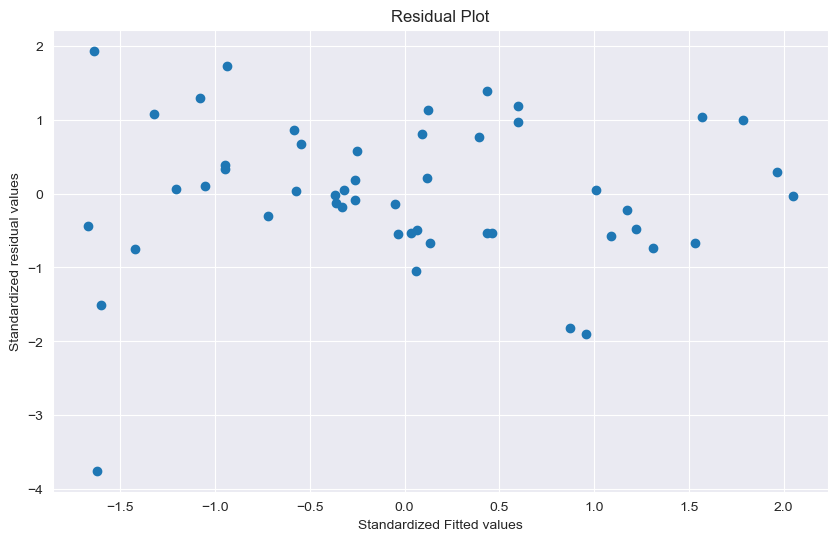

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(get_standardized_values(model.fittedvalues),    # ŷ
            get_standardized_values(model.resid))           # y-ŷ

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Here the Residual plot is scattered with no trend, which is ideal

In [34]:
# Model Deletion Diagnostics
# Detecting Outliers/Influencers

# Cook's Distance

from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

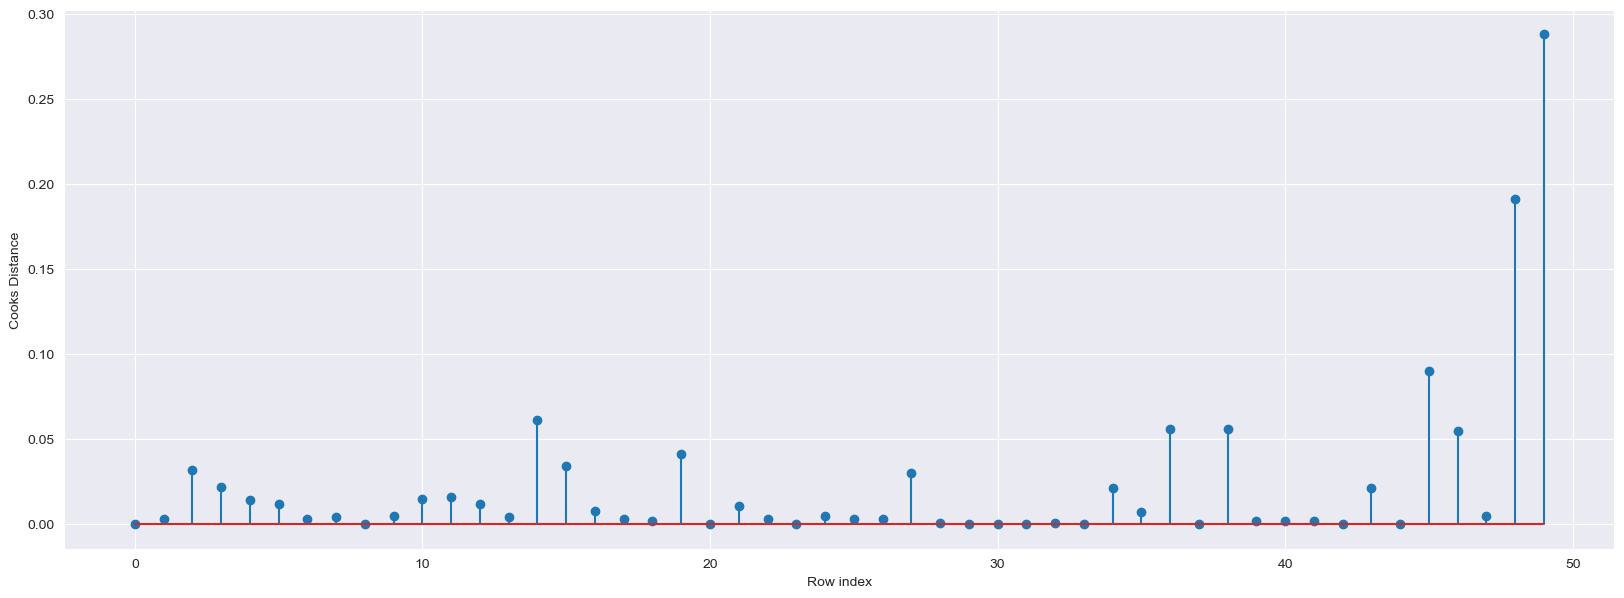

In [35]:
#Plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups)), np.round(c, 3))  # (Index:0-49, rounded c values)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [37]:
# High Influence Points

startups.shape

(50, 5)

In [38]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k + 1)/n) 
leverage_cutoff

0.36

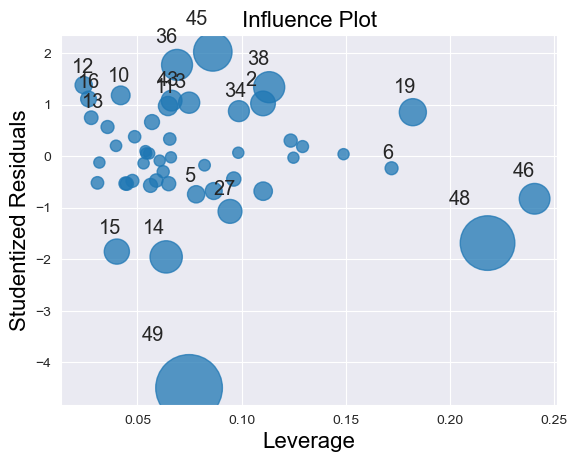

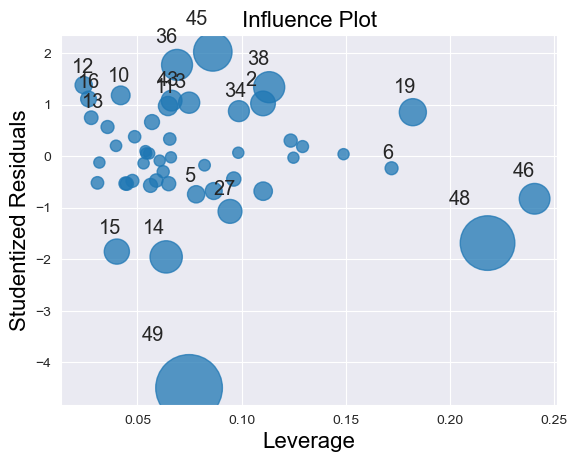

In [55]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

In [40]:
startups[startups.index.isin([49])]

# It looks like Data Point indexed 49 is an outlier. Need to remove it

,RAndD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [41]:
# Improving the Model

startups_new = startups.drop(startups.index[49],axis=0).reset_index()

In [42]:
startups_new

,index,RAndD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
startups_new=startups_new.drop(['index'],axis=1)

In [44]:
startups_new.head(7)

,RAndD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


In [45]:
# New Model

model2=smf.ols('Profit~RAndD_Spend+Administration+Marketing_Spend',data=startups_new).fit()
model2.params

Intercept          52382.439251
RAndD_Spend            0.783002
Administration        -0.022201
Marketing_Spend        0.025234
dtype: float64

In [46]:
model2.rsquared , model2.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [47]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols('Profit~RAndD_Spend+Administration+Marketing_Spend',data=startups_new).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        startups_new=startups_new.drop(startups_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        startups_new
    else:
        final_model=smf.ols('Profit~RAndD_Spend+Administration+Marketing_Spend',data=startups_new).fit()
        final_model.rsquared , model2.rsquared_adj
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [48]:
# Model Accuracy is approx 0.99

In [49]:
#New data for prediction

new_data=pd.DataFrame({'RAndD_Spend':150550.65,"Administration":124778.55,"Marketing_Spend":458577.47},index=[1])

In [50]:
new_data

,RAndD_Spend,Administration,Marketing_Spend
1,150550.65,124778.55,458577.47


In [51]:
data_pred=final_model.predict(new_data)
data_pred

1    176664.508529
dtype: float64

In [52]:
pred_y=final_model.predict(startups_new)
startups_new['pred_y']=pred_y

In [53]:
startups_new.head(7)

,RAndD_Spend,Administration,Marketing_Spend,State,Profit,pred_y
0,142107.34,91391.77,366168.42,Florida,166187.94,165589.539700
1,131876.90,99814.71,362861.36,New York,156991.12,158552.826483
2,130298.13,145530.06,323876.68,Florida,155752.60,156789.000710
3,120542.52,148718.95,311613.29,New York,152211.77,149524.698853
4,123334.88,108679.17,304981.62,California,149759.96,150122.356712
5,91992.39,135495.07,252664.93,California,134307.35,126598.769555
6,94657.16,145077.58,282574.31,New York,125370.37,130104.785747


In [54]:
# R2 Table

r2={'prep_model':['model_initial','model_final'],'R2-Value':[0.9587,0.9882]}
r2=pd.DataFrame(r2)
r2

,prep_model,R2-Value
0,model_initial,0.9587
1,model_final,0.9882
